In [1]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph # it is a framework that helps to build and manage the flow of tasks using graphs
from IPython.display import display, Image

In [2]:
# AgentState - shared data structure that keeps track of information as your application runs. 

class AgentState(TypedDict):    # our state_schema
    name: str

# Define the node of the graph
# A node represents a specific task or operation within the graph.
# This node sets a greeting message in the agent's state.
# The function takes the current state as input, modifies it by adding a greeting message, and returns the updated state.
def compliment_node(state: AgentState) -> AgentState:
    """Sets a greeting message in the agent's state."""

    # Modify the state to include a greeting message
    state['name'] = state["name"] + " you're doing an amazing job learning LangGraph!"

    # Return the updated state
    return state

In [3]:
graph = StateGraph(AgentState)  # Create a StateGraph instance with AgentState as the state type

# 1st parameter is the unique identifier for the node
# 2nd parameter is the function that defines the node's behavior
graph.add_node("compliment", compliment_node)  # Add the compliment_node to the graph with the identifier "greet"

# Set entry and exit points for the graph
graph.set_entry_point("compliment")  # Define "compliment" as the entry point of the graph
graph.set_finish_point("compliment")   # Define "compliment" as the exit point of the graph

# Compile the graph to prepare it for execution
app = graph.compile()

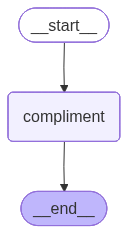

In [4]:
# visualize the graph structure using IPython display
display(Image(app.get_graph().draw_mermaid_png()))

In [5]:
# Execute the graph with an initial state
initial_state: AgentState = {"name": "Alice"}  # Define the initial state with message "Alice"
final_state: AgentState = app.invoke(initial_state)  # Invoke the graph with the initial state
final_state  # Display the final state after execution
# final_state['name']

{'name': "Alice you're doing an amazing job learning LangGraph!"}